# Laborator 4

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataPath = "C:\\Users\\corneliu.dumitru\\Desktop\\University\\Anul II\\IA\\Sem II\\Lab4\\data\\"
#load train images
train_images = np.loadtxt(dataPath + "train_images.txt")
train_labels = np.loadtxt(dataPath + "train_labels.txt",'int8')
print(train_images.shape)
print(train_images.ndim)
print(type(train_images[0,0]))
print(train_images.size)
print(train_images.nbytes)

(1000, 784)
2
<class 'numpy.float64'>
784000
6272000


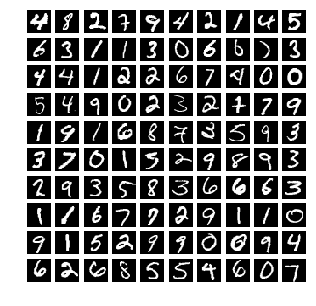

[[4 8 2 7 9 4 2 1 4 5]
 [6 3 1 1 3 0 6 6 7 3]
 [4 4 1 2 2 6 7 4 0 0]
 [5 4 9 0 2 3 2 7 7 9]
 [1 9 1 6 8 7 3 5 9 3]
 [3 7 0 1 3 2 9 8 9 3]
 [2 9 3 5 8 3 6 6 6 3]
 [1 1 6 7 7 2 9 1 1 0]
 [9 1 5 2 9 9 0 0 9 4]
 [6 2 6 8 5 5 4 6 0 7]]


In [8]:
#plot the first 100 training images with their labels in a 10 x 10 subplot
nbImages = 10
plt.figure(figsize=(5,5))
for i in range(nbImages**2):
    plt.subplot(nbImages,nbImages,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(train_images[i,:],(28,28)),cmap = "gray")
plt.show()
labels_nbImages = train_labels[:nbImages**2]
print(np.reshape(labels_nbImages,(nbImages,nbImages)))

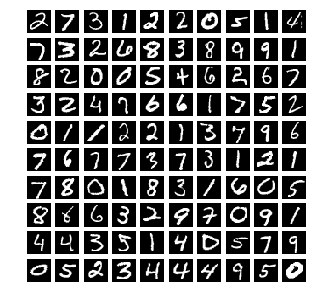

[[2 7 3 1 2 2 0 5 1 4]
 [7 3 2 6 8 3 8 9 9 1]
 [8 2 0 0 5 4 6 2 6 7]
 [3 2 4 7 6 6 1 7 5 2]
 [0 1 1 2 2 1 3 7 9 6]
 [7 6 7 7 3 7 3 1 2 1]
 [7 8 0 1 8 3 1 6 0 5]
 [8 6 6 3 2 9 7 0 9 1]
 [4 4 3 5 1 4 0 5 7 9]
 [0 5 2 3 4 4 4 9 5 0]]


In [9]:
#load test images
test_images = np.loadtxt(dataPath + "test_images.txt")
test_labels = np.loadtxt(dataPath + "test_labels.txt",'int8')
#plot the first 100 testing images with their labels in a 10 x 10 subplot
nbImages = 10
plt.figure(figsize=(5,5))
for i in range(nbImages**2):
    plt.subplot(nbImages,nbImages,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(test_images[i,:],(28,28)),cmap = "gray")
plt.show()
labels_nbImages = test_labels[:nbImages**2]
print(np.reshape(labels_nbImages,(nbImages,nbImages)))

In [10]:
#do 1-NN, 3-NN, 5-NN, 7 -NN for the first test image
#plot the neighbors
a = np.array([[1,2],[2,3],[3,2]])
b = np.array([2,5])
c = a - b
print(c)
c = np.sqrt(((a-b)**2).sum(axis=1))
print(c)

img = test_images[0]
distances = np.sqrt(((train_images - img)**2).sum(axis=1))



[[-1 -3]
 [ 0 -2]
 [ 1 -3]]
[3.16227766 2.         3.16227766]


804
1953.7185058242142
1953.7185058242142
1953.7185058242142
2


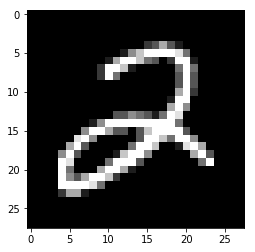

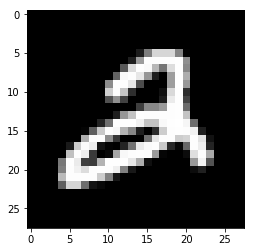

In [11]:
#define class Knn_classifier
indices = distances.argsort()
print(indices[0])
print(distances[804])
print(distances.min())
print(min(distances))

print(train_labels[804])
plt.imshow(np.reshape(img, (28, 28)), cmap='gray')
plt.show()

plt.imshow(np.reshape(train_images[804], (28, 28)), cmap='gray')
plt.show()

In [12]:
indices_knn = indices[:7]
train_labels_knn = train_labels[indices_knn]
print(train_labels_knn)

c = np.bincount(train_labels_knn)
print(c.argmax())



[2 2 2 2 4 2 2]
2


In [13]:
class Knn_classifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        if metric == 'l2':
            distances = np.sqrt(((self.train_images - test_image)**2).sum(axis=1))
        elif metric == 'l1':
            distances = (np.abs(self.train_images - test_image)).sum(axis=1)
        else:
            print("Error")
        
        indices = distances.argsort()
        indices_knn = indices[:num_neighbors]
        train_labels_knn = self.train_labels[indices_knn]
        
        c = np.bincount(train_labels_knn)
        
        return c.argmax()

In [14]:
classifier = Knn_classifier(train_images, train_labels)

print(classifier.classify_image(test_images[0]))

predicted_labels = np.zeros(len(test_images))
for i in range(len(test_images)):
    predicted_labels[i] = classifier.classify_image(test_images[i])

2


In [15]:
def compute_accuracy(true_labels, predicted_labels):
    return (true_labels == predicted_labels).mean()

print(compute_accuracy(test_labels, predicted_labels))

0.898


In [16]:
k = np.array([1, 3, 5, 7, 9])
accuracy_l1 = np.zeros(len(k))
accuracy_l2 = np.zeros(len(k))

for i in range(len(k)):
    num_neighbors = k[i]
    predicted_labels_l1 = np.zeros(len(test_images))
    for j in range(len(test_images)):
        predicted_labels_l1[j] = classifier.classify_image(test_images[j], num_neighbors, 'l1')
    
    accuracy_l1[i] = compute_accuracy(test_labels, predicted_labels_l1)

for i in range(len(k)):
    num_neighbors = k[i]
    predicted_labels_l2 = np.zeros(len(test_images))
    for j in range(len(test_images)):
        predicted_labels_l2[j] = classifier.classify_image(test_images[j], num_neighbors, 'l2')
    
    accuracy_l2[i] = compute_accuracy(test_labels, predicted_labels_l2)

print(accuracy_l1)
print(accuracy_l2)

[0.88  0.884 0.868 0.864 0.864]
[0.884 0.898 0.896 0.88  0.88 ]


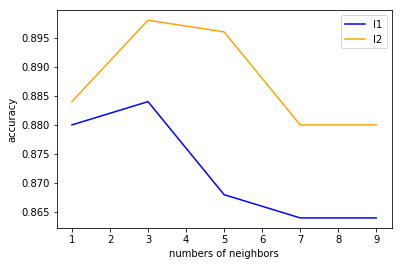

In [19]:
plt.plot(k, accuracy_l1, 'b')
plt.plot(k, accuracy_l2, 'orange')
plt.xlabel('numbers of neighbors')
plt.ylabel('accuracy')
plt.legend(('l1', 'l2'))
plt.show()